In [63]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import re
import seaborn as sns


# Importing DF cleaned

In [64]:
df_analyze = pd.read_csv('/Users/danielnavia/Documents/Thesis Foolery/ Databases Raw/cleaned_options_data.csv')

In [65]:
#Convert date to date
df_analyze["Date"] = pd.to_datetime(df_analyze['Date'])


In [66]:
#Convert the expiration date 
# 2. Convert Expiration to proper datetime
def parse_expiration(exp_str):
    # Converting formats like "APR20" to "2020-04-30" (last day of month)
    month_dict = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 
                 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
    
    month = month_dict[exp_str[:3]]
    year = 2000 + int(exp_str[3:])  # Assuming 20xx years
    
    # Get last day of the month
    if month == 12:
        last_day = pd.Timestamp(year+1, 1, 1) - pd.Timedelta(days=1)
    else:
        last_day = pd.Timestamp(year, month+1, 1) - pd.Timedelta(days=1)
    
    return last_day

df_analyze['Expiration_Date'] = df_analyze['Expiration'].apply(parse_expiration)

In [67]:
df_analyze

,Date,Option_Type,Underlying,Expiration,Strike,IMPLIED_VOL.,PRICE,Days_to_Expiration,T,Expiration_Date
0,2019-11-22,CALL,GXE,APR20,2000.0,0.5187,1656.8,147,0.402464,2020-04-30
1,2019-11-22,CALL,GXE,APR20,2500.0,0.3506,1158.5,147,0.402464,2020-04-30
2,2019-11-22,CALL,GXE,APR20,3000.0,0.2389,670.6,147,0.402464,2020-04-30
3,2019-11-22,CALL,GXE,APR20,3500.0,0.1602,230.9,147,0.402464,2020-04-30
4,2019-11-22,CALL,GXE,APR20,4000.0,0.1064,10.3,147,0.402464,2020-04-30
...,...,...,...,...,...,...,...,...,...,...
149595,2024-12-19,PUT,GXE,DEC24,4000.0,1.0464,0.2,1,0.002738,2024-12-31
149596,2024-12-19,PUT,GXE,DEC24,4500.0,0.5153,0.5,1,0.002738,2024-12-31
149597,2024-12-19,PUT,GXE,DEC24,5000.0,0.1060,118.3,1,0.002738,2024-12-31
149598,2024-12-19,PUT,GXE,DEC24,5500.0,0.2021,617.9,1,0.002738,2024-12-31


In [68]:
# Verify consistency between days to expiration and T
# 3. Verify consistency between Days_to_Expiration and T
df_analyze['Calculated_T'] = df_analyze['Days_to_Expiration'] / 365
df_analyze['T_Difference'] = abs(df_analyze['T'] - df_analyze['Calculated_T'])

In [69]:
df_analyze.tail(2)

,Date,Option_Type,Underlying,Expiration,Strike,IMPLIED_VOL.,PRICE,Days_to_Expiration,T,Expiration_Date,Calculated_T,T_Difference
149598,2024-12-19,PUT,GXE,DEC24,5500.0,0.2021,617.9,1,0.002738,2024-12-31,0.00274,0.000002
149599,2024-12-19,PUT,GXE,DEC24,6000.0,0.3459,1117.9,1,0.002738,2024-12-31,0.00274,0.000002


# EDA and proof checking

## Relevant to the Dataset

In [70]:
# Basic statistics
print(f"Dataset shape: {df_analyze.shape}")
print(f"Date range: {df_analyze['Date'].min()} to {df_analyze['Date'].max()}")
print(f"Missing values:\n{df_analyze.isnull().sum()}")

# Check for duplicates
duplicates = df_analyze.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Dataset shape: (149600, 12)
Date range: 2019-11-22 00:00:00 to 2024-12-19 00:00:00
Missing values:
Date                  0
Option_Type           0
Underlying            0
Expiration            0
Strike                0
IMPLIED_VOL.          0
PRICE                 0
Days_to_Expiration    0
T                     0
Expiration_Date       0
Calculated_T          0
T_Difference          0
dtype: int64
Number of duplicate rows: 0


## Relevant to the options

Option types:
Option_Type
PUT     74951
CALL    74649
Name: count, dtype: int64
Top 10 expirations:
Expiration
JUN22    7666
SEP22    7524
MAR22    5574
DEC24    4572
DEC23    4482
DEC20    4480
SEP21    4478
DEC22    4437
NOV23    4122
NOV24    3943
Name: count, dtype: int64


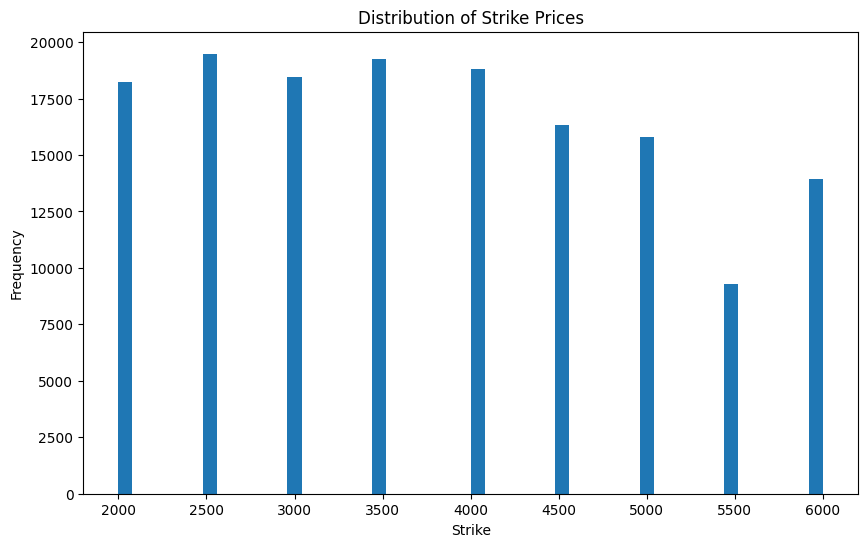

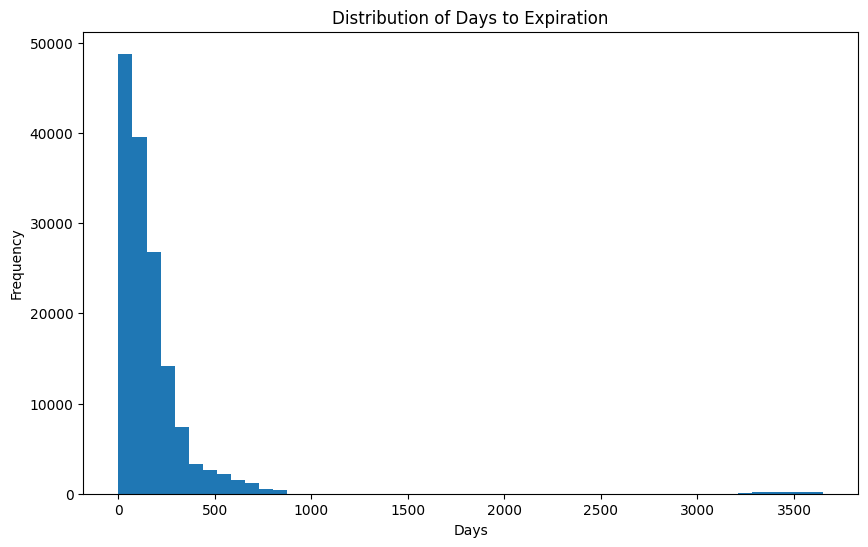

In [71]:
# Option type distribution
option_type_counts = df_analyze['Option_Type'].value_counts()
print(f"Option types:\n{option_type_counts}")

# Expiration distribution
expiration_counts = df_analyze['Expiration'].value_counts().head(10)
print(f"Top 10 expirations:\n{expiration_counts}")

# Strike price distribution
plt.figure(figsize=(10, 6))
plt.hist(df_analyze['Strike'], bins=50)
plt.title('Distribution of Strike Prices')
plt.xlabel('Strike')
plt.ylabel('Frequency')
plt.show()

# Time to expiration distribution
plt.figure(figsize=(10, 6))
plt.hist(df_analyze['Days_to_Expiration'], bins=50)
plt.title('Distribution of Days to Expiration')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


## Volatility Check

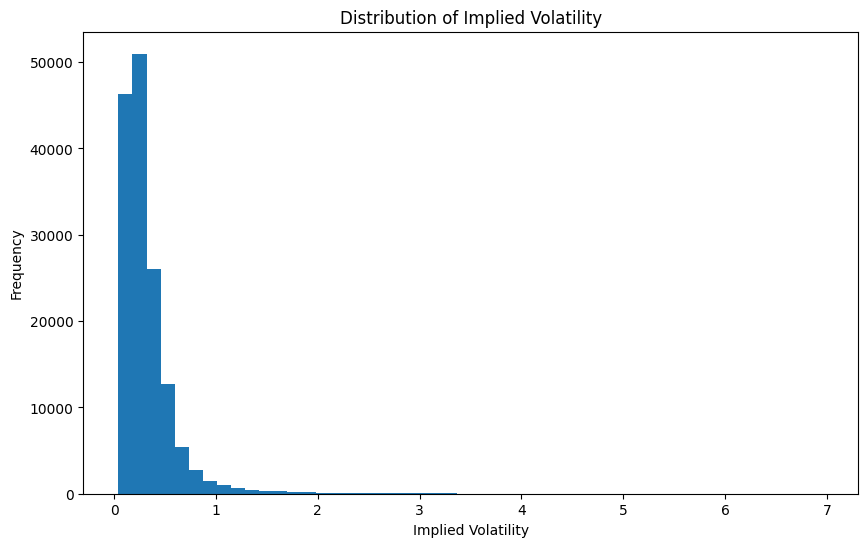

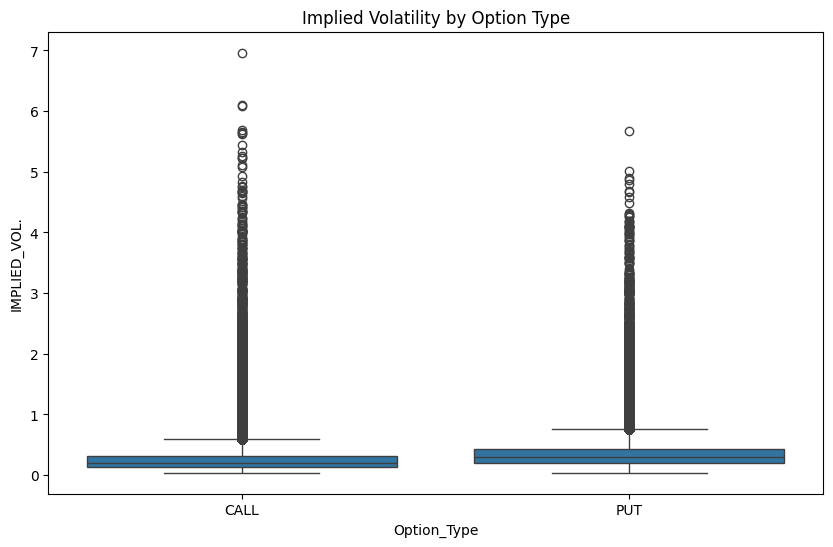

Options with extreme IV values: 4194


In [72]:
# Overall IV distribution
plt.figure(figsize=(10, 6))
plt.hist(df_analyze['IMPLIED_VOL.'], bins=50)
plt.title('Distribution of Implied Volatility')
plt.xlabel('Implied Volatility')
plt.ylabel('Frequency')
plt.show()

# IV by option type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Option_Type', y='IMPLIED_VOL.', data=df_analyze)
plt.title('Implied Volatility by Option Type')
plt.show()

# Check for unrealistic IV values
extreme_iv = df_analyze[(df_analyze['IMPLIED_VOL.'] > 1.0) | (df_analyze['IMPLIED_VOL.'] < 0.05)]
print(f"Options with extreme IV values: {len(extreme_iv)}")


## Temporal Analysis

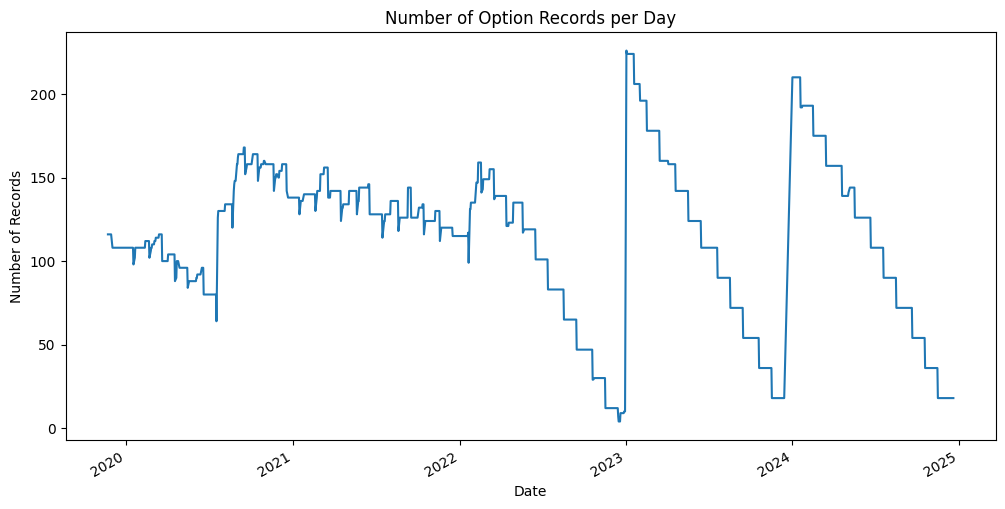

Number of dates without data: 541


In [73]:
# Group by date to see records per day
records_per_day = df_analyze.groupby('Date').size()
plt.figure(figsize=(12, 6))
records_per_day.plot()
plt.title('Number of Option Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.show()

# Check for gaps in the time series
date_range = pd.date_range(start=df_analyze['Date'].min(), end=df_analyze['Date'].max())
missing_dates = set(date_range) - set(df_analyze['Date'].unique())
print(f"Number of dates without data: {len(missing_dates)}")


## Option pricing analysis

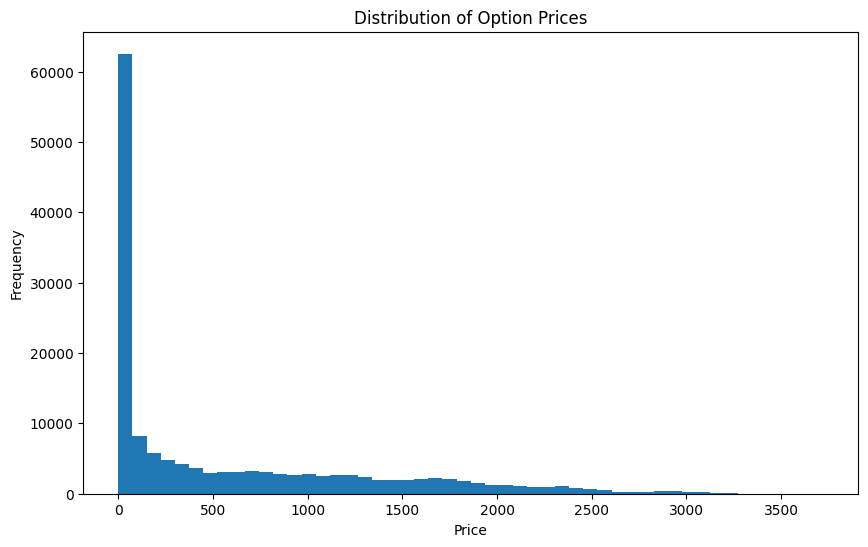

Options with zero price: 0
Options with very high prices (>2000): 9606


In [74]:
# Price distribution
plt.figure(figsize=(10, 6))
plt.hist(df_analyze['PRICE'], bins=50)
plt.title('Distribution of Option Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check for suspicious prices
zero_prices = df_analyze[df_analyze['PRICE'] == 0]
print(f"Options with zero price: {len(zero_prices)}")

very_high_prices = df_analyze[df_analyze['PRICE'] > 2000]
print(f"Options with very high prices (>2000): {len(very_high_prices)}")


## Strike vs Expiration heatmap

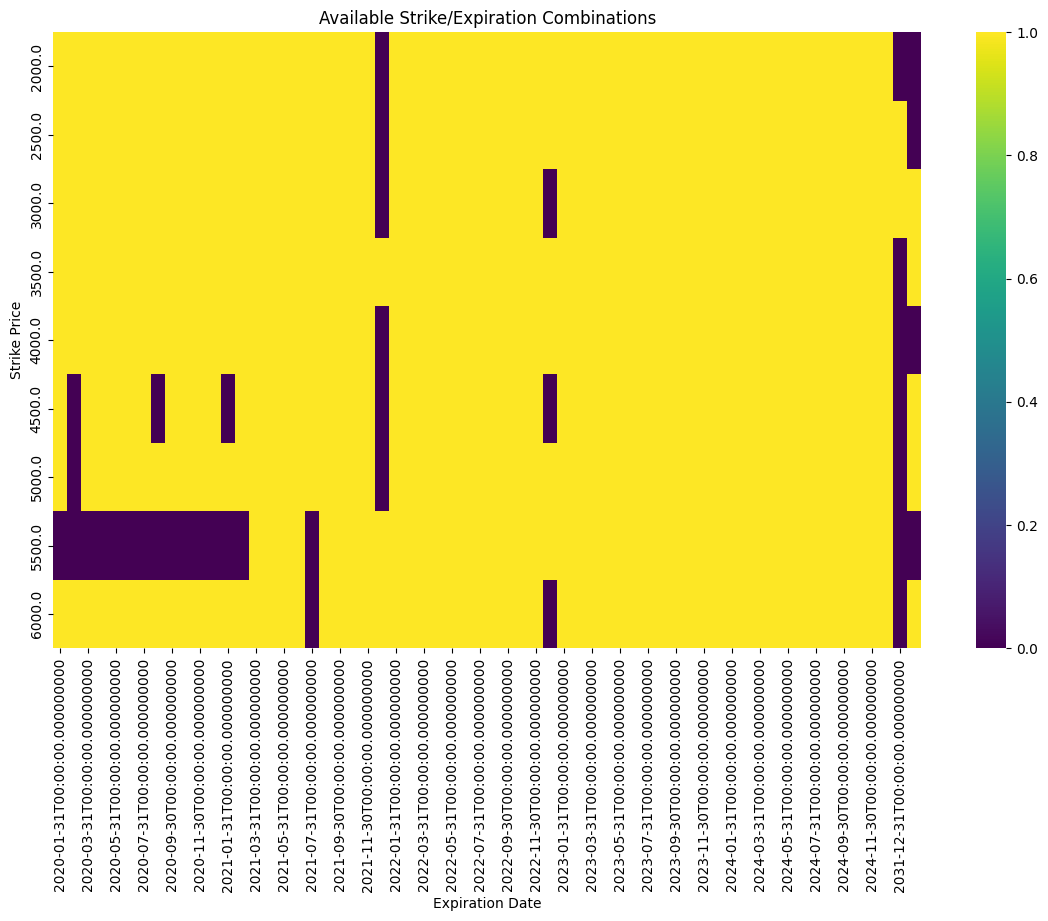

In [75]:
# Create a pivot table of counts for strikes and expirations
pivot = df_analyze.pivot_table(
    index='Strike', 
    columns='Expiration_Date',
    values='IMPLIED_VOL.',
    aggfunc='count'
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot.notnull(), cmap='viridis')
plt.title('Available Strike/Expiration Combinations')
plt.ylabel('Strike Price')
plt.xlabel('Expiration Date')
plt.show()


## Filtering outliers in data that could possibly affect the model

In [76]:
#Filtering the suspicious high Implied Volatility Options
df_clean = df_analyze[(df_analyze['IMPLIED_VOL.'] >= 0.05) & (df_analyze['IMPLIED_VOL.'] <= 1.0)]
print(f"Removed {len(df_analyze) - len(df_clean)} rows with extreme IV values")

Removed 4194 rows with extreme IV values


In [77]:
#Filter the above 1000 days to expiration
df_clean = df_clean[df_clean['Days_to_Expiration'] <= 730]  # Max Limit to 2 years
print(f"Restricted to options with ≤ 2 years to expiration")


Restricted to options with ≤ 2 years to expiration


In [78]:
# 3. Split historical vs future data
current_date = pd.Timestamp('2025-04-21')  # Adjust as needed
df_historical = df_clean[df_clean['Date'] <= current_date]
df_future = df_clean[df_clean['Date'] > current_date]
print(f"Historical data: {len(df_historical)} rows, Future data: {len(df_future)} rows")

Historical data: 143391 rows, Future data: 0 rows


In [79]:
# 4. Analyze date gaps in historical data
date_range = pd.date_range(start=df_historical['Date'].min(), end=df_historical['Date'].max())
trading_dates = date_range[date_range.dayofweek < 5]  # Monday-Friday
missing_trading_dates = set(trading_dates) - set(df_historical['Date'].unique())
print(f"Missing trading dates: {len(missing_trading_dates)}")

Missing trading dates: 22


In [80]:
df_clean.dtypes

Date                  datetime64[ns]
Option_Type                   object
Underlying                    object
Expiration                    object
Strike                       float64
IMPLIED_VOL.                 float64
PRICE                        float64
Days_to_Expiration             int64
T                            float64
Expiration_Date       datetime64[ns]
Calculated_T                 float64
T_Difference                 float64
dtype: object

In [81]:
# Implementation to streamline the dataset
df_hedging = df_clean[['Date', 'Option_Type','Expiration','Strike', 'IMPLIED_VOL.', 
                       'PRICE', 'T', 'Expiration_Date', 'Days_to_Expiration']]

## DF hedging final Database EDA

In [82]:
# Verifying dimensions and data types
print(f"Dataset shape: {df_hedging.shape}")
print(f"Data types:\n{df_hedging.dtypes}")

# Checking for missing values
missing_values = df_hedging.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Checking for duplicates
duplicates = df_hedging.duplicated()
print(f"Duplicate rows: {duplicates.sum()}")


Dataset shape: (143391, 9)
Data types:
Date                  datetime64[ns]
Option_Type                   object
Expiration                    object
Strike                       float64
IMPLIED_VOL.                 float64
PRICE                        float64
T                            float64
Expiration_Date       datetime64[ns]
Days_to_Expiration             int64
dtype: object
Missing values:
Date                  0
Option_Type           0
Expiration            0
Strike                0
IMPLIED_VOL.          0
PRICE                 0
T                     0
Expiration_Date       0
Days_to_Expiration    0
dtype: int64
Duplicate rows: 0


In [83]:
# Date ranges
print(f"Trading dates: {df_hedging['Date'].min()} to {df_hedging['Date'].max()}")
print(f"Expiration dates: {df_hedging['Expiration_Date'].min()} to {df_hedging['Expiration_Date'].max()}")

# Verify logical ordering (expiration > trading date)
invalid_dates = df_hedging[df_hedging['Expiration_Date'] <= df_hedging['Date']]
print(f"Invalid date relationships: {len(invalid_dates)} rows")

# Verify T and Days_to_Expiration consistency
df_hedging['Calculated_T'] = df_hedging['Days_to_Expiration'] / 365
df_hedging['T_Error'] = abs(df_hedging['T'] - df_hedging['Calculated_T'])
print(f"Max T calculation error: {df_hedging['T_Error'].max()}")
print(f"Records with significant T error (>0.01): {sum(df_hedging['T_Error'] > 0.01)}")

# Check Day count consistency with date difference
df_hedging['Actual_Days'] = (df_hedging['Expiration_Date'] - df_hedging['Date']).dt.days
df_hedging['Days_Error'] = abs(df_hedging['Days_to_Expiration'] - df_hedging['Actual_Days'])
print(f"Max days error: {df_hedging['Days_Error'].max()}")
print(f"Records with days error: {sum(df_hedging['Days_Error'] > 0)}")


Trading dates: 2019-11-22 00:00:00 to 2024-12-19 00:00:00
Expiration dates: 2020-01-31 00:00:00 to 2024-12-31 00:00:00
Invalid date relationships: 0 rows
Max T calculation error: 0.001368925393566034
Records with significant T error (>0.01): 0
Max days error: 16
Records with days error: 143391


/var/folders/dd/8bs90_x11fxby7j1952zh8m00000gn/T/ipykernel_61286/1204072812.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hedging['Calculated_T'] = df_hedging['Days_to_Expiration'] / 365
/var/folders/dd/8bs90_x11fxby7j1952zh8m00000gn/T/ipykernel_61286/1204072812.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hedging['T_Error'] = abs(df_hedging['T'] - df_hedging['Calculated_T'])


              Strike          PRICE   IMPLIED_VOL.
count  143391.000000  143391.000000  143391.000000
mean     3840.868674     566.928739       0.290530
std      1232.720561     723.879458       0.173528
min      2000.000000       0.100000       0.050600
25%      3000.000000       6.100000       0.162400
50%      4000.000000     184.600000       0.240800
75%      5000.000000     988.150000       0.373600
max      6000.000000    3720.700000       0.999800


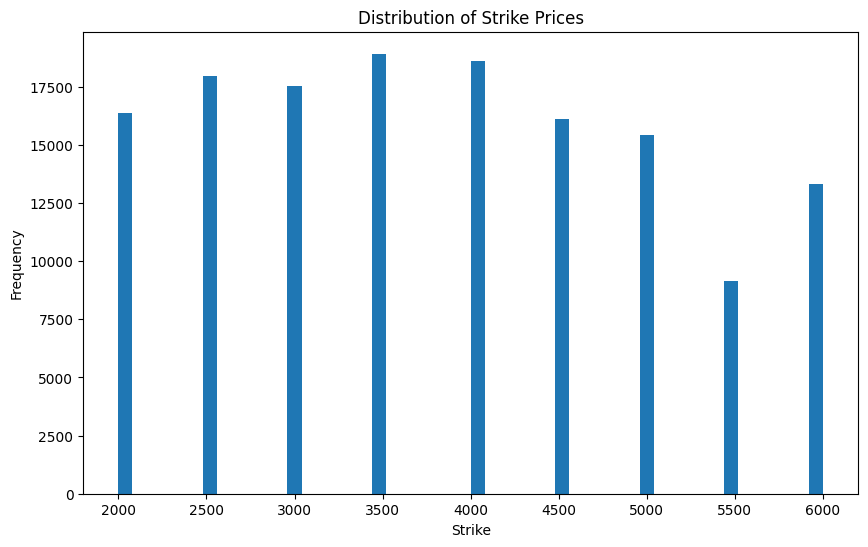

Correlation between Strike and Price for calls:
          Strike     PRICE
Strike  1.000000 -0.800048
PRICE  -0.800048  1.000000
Options with extreme implied volatility: 2709 rows


In [84]:
# Summary statistics
print(df_hedging[['Strike', 'PRICE', 'IMPLIED_VOL.']].describe())

# Strike distribution
plt.figure(figsize=(10, 6))
plt.hist(df_hedging['Strike'], bins=50)
plt.title('Distribution of Strike Prices')
plt.xlabel('Strike')
plt.ylabel('Frequency')
plt.show()

# Check logical relationships
# Calls: Higher strike = lower price (generally)
call_sample = df_hedging[(df_hedging['Option_Type'] == 'CALL') & 
                         (df_hedging['Days_to_Expiration'] > 30) & 
                         (df_hedging['Days_to_Expiration'] < 90)]
call_corr = call_sample[['Strike', 'PRICE']].corr()
print(f"Correlation between Strike and Price for calls:\n{call_corr}")

# Implied volatility reasonableness
extreme_vol = df_hedging[(df_hedging['IMPLIED_VOL.'] < 0.05) | 
                          (df_hedging['IMPLIED_VOL.'] > 0.8)]
print(f"Options with extreme implied volatility: {len(extreme_vol)} rows")


In [85]:
# Option type distribution
option_counts = df_hedging['Option_Type'].value_counts()
print(f"Option type distribution:\n{option_counts}")

# Check if we have matching puts and calls
sample_date = df_hedging['Date'].min()
sample_exp = df_hedging['Expiration_Date'].min()
sample_df = df_hedging[(df_hedging['Date'] == sample_date) & 
                        (df_hedging['Expiration_Date'] == sample_exp)]

# Count strikes with both puts and calls
strike_coverage = sample_df.groupby('Strike')['Option_Type'].nunique()
complete_strikes = strike_coverage[strike_coverage == 2]
print(f"Strikes with both puts and calls: {len(complete_strikes)} out of {len(strike_coverage)}")


Option type distribution:
Option_Type
PUT     71883
CALL    71508
Name: count, dtype: int64
Strikes with both puts and calls: 8 out of 8


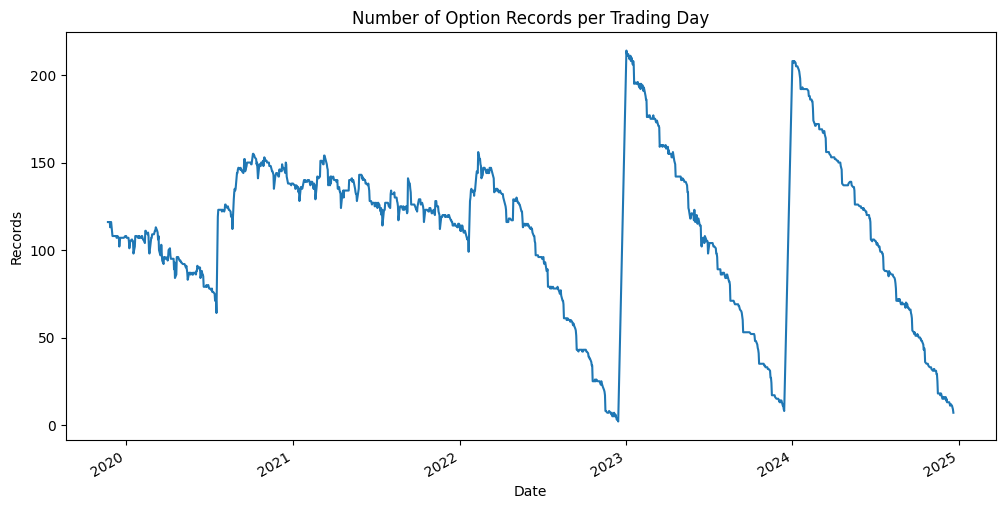

Missing trading days: 22 out of 1325


In [86]:
# Count options per trading day
records_per_day = df_hedging.groupby('Date').size()
plt.figure(figsize=(12, 6))
records_per_day.plot()
plt.title('Number of Option Records per Trading Day')
plt.xlabel('Date')
plt.ylabel('Records')
plt.show()

# Identify gaps in time series
all_dates = pd.date_range(start=df_hedging['Date'].min(), end=df_hedging['Date'].max())
trading_days = all_dates[all_dates.dayofweek < 5]  # Monday-Friday
missing_days = set(trading_days) - set(df_hedging['Date'].unique())
print(f"Missing trading days: {len(missing_days)} out of {len(trading_days)}")


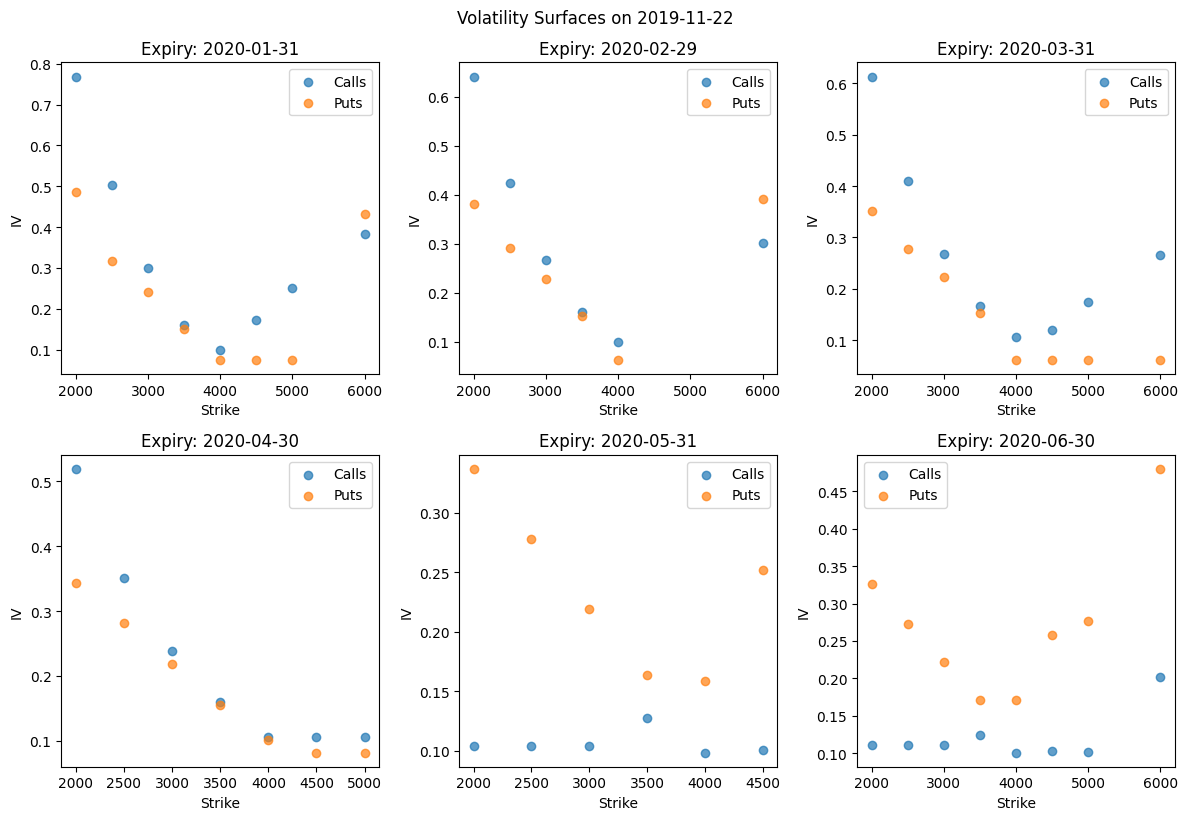

In [87]:
# Check a specific volatility surface
sample_date = df_hedging['Date'].min()
plt.figure(figsize=(12, 8))

# Group by expiration and create subplots
expirations = df_hedging[df_hedging['Date'] == sample_date]['Expiration_Date'].unique()
expirations = sorted(expirations)[:min(6, len(expirations))]  # Take up to 6 expirations

for i, expiry in enumerate(expirations, 1):
    plt.subplot(2, 3, i)
    
    data = df_hedging[(df_hedging['Date'] == sample_date) & 
                       (df_hedging['Expiration_Date'] == expiry)]
    
    calls = data[data['Option_Type'] == 'CALL']
    puts = data[data['Option_Type'] == 'PUT']
    
    plt.scatter(calls['Strike'], calls['IMPLIED_VOL.'], label='Calls', alpha=0.7)
    plt.scatter(puts['Strike'], puts['IMPLIED_VOL.'], label='Puts', alpha=0.7)
    
    plt.title(f'Expiry: {expiry.date()}')
    plt.xlabel('Strike')
    plt.ylabel('IV')
    plt.legend()

plt.tight_layout()
plt.suptitle(f'Volatility Surfaces on {sample_date.date()}', y=1.02)
plt.show()


In [88]:
# Drop temporary columns used for validation
df_hedging = df_hedging.drop(['T_Error', 'Actual_Days', 'Days_Error', 'Calculated_T'], axis=1, errors='ignore')

# Data quality summary
quality_report = {
    "Total records": len(df_hedging),
    "Date range": f"{df_hedging['Date'].min()} to {df_hedging['Date'].max()}",
    "Missing values": df_hedging.isnull().sum().sum(),
    "Duplicate records": duplicates.sum(),
    "Invalid date relationships": len(invalid_dates),
    "Extreme volatilities": len(extreme_vol),
    "Missing trading days": len(missing_days)
}

print("\nData Quality Summary:")
for key, value in quality_report.items():
    print(f"{key}: {value}")



Data Quality Summary:
Total records: 143391
Date range: 2019-11-22 00:00:00 to 2024-12-19 00:00:00
Missing values: 0
Duplicate records: 0
Invalid date relationships: 0
Extreme volatilities: 2709
Missing trading days: 22


In [89]:
df_hedging

,Date,Option_Type,Expiration,Strike,IMPLIED_VOL.,PRICE,T,Expiration_Date,Days_to_Expiration
0,2019-11-22,CALL,APR20,2000.0,0.5187,1656.8,0.402464,2020-04-30,147
1,2019-11-22,CALL,APR20,2500.0,0.3506,1158.5,0.402464,2020-04-30,147
2,2019-11-22,CALL,APR20,3000.0,0.2389,670.6,0.402464,2020-04-30,147
3,2019-11-22,CALL,APR20,3500.0,0.1602,230.9,0.402464,2020-04-30,147
4,2019-11-22,CALL,APR20,4000.0,0.1064,10.3,0.402464,2020-04-30,147
...,...,...,...,...,...,...,...,...,...
149589,2024-12-19,CALL,DEC24,5500.0,0.6104,0.1,0.002738,2024-12-31,1
149596,2024-12-19,PUT,DEC24,4500.0,0.5153,0.5,0.002738,2024-12-31,1
149597,2024-12-19,PUT,DEC24,5000.0,0.1060,118.3,0.002738,2024-12-31,1
149598,2024-12-19,PUT,DEC24,5500.0,0.2021,617.9,0.002738,2024-12-31,1


In [90]:
def third_friday(year, month):
    """Find the third Friday of the given month and year."""
    # Start with the first day of the month
    d = pd.Timestamp(year, month, 1)
    
    # Find the first Friday (weekday == 4 where Monday is 0)
    while d.weekday() != 4:
        d += pd.Timedelta(days=1)
    
    # Move to the third Friday
    d += pd.Timedelta(days=14)  # 2 more weeks
    
    return d

def adjust_expiration(exp_str):
    """Convert expiration code to third Friday date."""
    month_dict = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 
                 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
    
    month = month_dict[exp_str[:3]]
    year = 2000 + int(exp_str[3:])  # Assuming 20xx years
    
    return third_friday(year, month)

# Apply the function to update the Expiration_Date column
df_hedging['Expiration_Date'] = df_hedging['Expiration'].apply(adjust_expiration)

# Recalculate Days_to_Expiration and T based on the adjusted dates
df_hedging['Days_to_Expiration'] = (df_hedging['Expiration_Date'] - df_hedging['Date']).dt.days
df_hedging['T'] = df_hedging['Days_to_Expiration'] / 365.0  # Using calendar days

# Verify a sample of the changes
sample_expirations = df_hedging[['Expiration', 'Expiration_Date']].drop_duplicates().sort_values('Expiration_Date').head(10)
print("Sample of adjusted expiration dates:")
print(sample_expirations)

# Validate that all expiration dates are now Fridays
friday_check = df_hedging['Expiration_Date'].dt.dayofweek == 4  # 4 = Friday
print(f"\nPercentage of expiration dates that fall on Friday: {100 * friday_check.mean():.2f}%")

# Check for any invalid date relationships after adjustment
invalid_dates = df_hedging[df_hedging['Expiration_Date'] <= df_hedging['Date']]
print(f"\nInvalid date relationships after adjustment: {len(invalid_dates)} rows")


Sample of adjusted expiration dates:
      Expiration Expiration_Date
21         JAN20      2020-01-17
15         FEB20      2020-02-21
37         MAR20      2020-03-20
0          APR20      2020-04-17
45         MAY20      2020-05-15
29         JUN20      2020-06-19
4486       JUL20      2020-07-17
7189       AUG20      2020-08-21
51         SEP20      2020-09-18
11488      OCT20      2020-10-16

Percentage of expiration dates that fall on Friday: 100.00%

Invalid date relationships after adjustment: 0 rows


In [91]:
# Sort by trading date, then by expiration date (soonest first)
df_hedging_sorted = df_hedging.sort_values(['Date', 'Expiration_Date', 'Strike'])

# If you want the index reset (optional):
df_hedging_sorted = df_hedging_sorted.reset_index(drop=True)

# Preview the result
print(df_hedging_sorted[['Date', 'Expiration_Date', 'Strike']].head(10))


        Date Expiration_Date  Strike
0 2019-11-22      2020-01-17  2000.0
1 2019-11-22      2020-01-17  2000.0
2 2019-11-22      2020-01-17  2500.0
3 2019-11-22      2020-01-17  2500.0
4 2019-11-22      2020-01-17  3000.0
5 2019-11-22      2020-01-17  3000.0
6 2019-11-22      2020-01-17  3500.0
7 2019-11-22      2020-01-17  3500.0
8 2019-11-22      2020-01-17  4000.0
9 2019-11-22      2020-01-17  4000.0


In [92]:
df_hedging_sorted

,Date,Option_Type,Expiration,Strike,IMPLIED_VOL.,PRICE,T,Expiration_Date,Days_to_Expiration
0,2019-11-22,CALL,JAN20,2000.0,0.7689,1677.7,0.153425,2020-01-17,56
1,2019-11-22,PUT,JAN20,2000.0,0.4869,0.1,0.153425,2020-01-17,56
2,2019-11-22,CALL,JAN20,2500.0,0.5039,1177.4,0.153425,2020-01-17,56
3,2019-11-22,PUT,JAN20,2500.0,0.3167,0.1,0.153425,2020-01-17,56
4,2019-11-22,CALL,JAN20,3000.0,0.2991,678.7,0.153425,2020-01-17,56
...,...,...,...,...,...,...,...,...,...
143386,2024-12-19,CALL,DEC24,5000.0,0.1687,0.3,0.002740,2024-12-20,1
143387,2024-12-19,PUT,DEC24,5000.0,0.1060,118.3,0.002740,2024-12-20,1
143388,2024-12-19,CALL,DEC24,5500.0,0.6104,0.1,0.002740,2024-12-20,1
143389,2024-12-19,PUT,DEC24,5500.0,0.2021,617.9,0.002740,2024-12-20,1


## Final check

In [93]:
print("Shape of df_hedging_sorted:", df_hedging_sorted.shape)
print("\nMissing values per column:\n", df_hedging_sorted.isnull().sum())
print("\nTotal duplicate rows:", df_hedging_sorted.duplicated().sum())

Shape of df_hedging_sorted: (143391, 9)

Missing values per column:
 Date                  0
Option_Type           0
Expiration            0
Strike                0
IMPLIED_VOL.          0
PRICE                 0
T                     0
Expiration_Date       0
Days_to_Expiration    0
dtype: int64

Total duplicate rows: 0


In [94]:
invalid_dates = df_hedging_sorted[df_hedging_sorted["Expiration_Date"] < df_hedging_sorted["Date"]]
print("\nRecords with Expiration_Date earlier than Date:", invalid_dates.shape)


Records with Expiration_Date earlier than Date: (0, 9)


In [95]:
print("\nDate range:", df_hedging_sorted["Date"].min(), "to", df_hedging_sorted["Date"].max())
print("Expiration_Date range:", df_hedging_sorted["Expiration_Date"].min(), "to", df_hedging_sorted["Expiration_Date"].max())


Date range: 2019-11-22 00:00:00 to 2024-12-19 00:00:00
Expiration_Date range: 2020-01-17 00:00:00 to 2024-12-20 00:00:00


In [96]:
df_hedging_sorted["Calculated_Days"] = (df_hedging_sorted["Expiration_Date"] - df_hedging_sorted["Date"]).dt.days
df_hedging_sorted["Days_Error"] = abs(df_hedging_sorted["Calculated_Days"] - df_hedging_sorted["Days_to_Expiration"])
max_days_error = df_hedging_sorted["Days_Error"].max()
num_days_error = (df_hedging_sorted["Days_Error"] > 0).sum()
print("\nMaximum error in Days_to_Expiration:", max_days_error)
print("Number of records with nonzero Days_to_Expiration error:", num_days_error)


Maximum error in Days_to_Expiration: 0
Number of records with nonzero Days_to_Expiration error: 0


In [97]:
df_hedging_sorted["Calculated_T"] = df_hedging_sorted["Days_to_Expiration"] / 365.0
df_hedging_sorted["T_Error"] = abs(df_hedging_sorted["T"] - df_hedging_sorted["Calculated_T"])
max_T_error = df_hedging_sorted["T_Error"].max()
num_T_error = (df_hedging_sorted["T_Error"] > 0.01).sum()
print("\nMaximum error in T (years):", max_T_error)
print("Number of records with T error greater than 0.01:", num_T_error)


Maximum error in T (years): 0.0
Number of records with T error greater than 0.01: 0


In [98]:
sorted_check = df_hedging_sorted.equals(df_hedging_sorted.sort_values(["Date", "Expiration_Date"]))
print("\nDataframe properly sorted by Date and Expiration_Date:", sorted_check)


Dataframe properly sorted by Date and Expiration_Date: True


In [99]:
quality_summary = {
"Total records": df_hedging_sorted.shape,
"Missing values (total)": df_hedging_sorted.isnull().sum().sum(),
"Duplicate records": df_hedging_sorted.duplicated().sum(),
"Invalid temporal records": invalid_dates.shape,
"Max Days_to_Expiration error": max_days_error,
"Records with Days error": num_days_error,
"Max T error": max_T_error,
"Records with T error (>0.01)": num_T_error
}
print("\nFinal Data Quality Summary:")
for key, value in quality_summary.items():
    print(f"{key}: {value}")


Final Data Quality Summary:
Total records: (143391, 13)
Missing values (total): 0
Duplicate records: 0
Invalid temporal records: (0, 9)
Max Days_to_Expiration error: 0
Records with Days error: 0
Max T error: 0.0
Records with T error (>0.01): 0


## Export to CSV

In [100]:
temporal_cols = ["Calculated_T", "T_Error", "Calculated_Days", "Days_Error"]
df_hedging_sorted = df_hedging_sorted.drop(columns=temporal_cols, errors="ignore")

In [101]:
#df_hedging_sorted.to_csv("/Users/danielnavia/Documents/Thesis Foolery/df_hedging_sorted_final.csv", index=False)

# Joining Datasets Option, Underlying

In [102]:
underlying_df = pd.read_csv('/Users/danielnavia/Documents/Thesis Foolery/ Databases Raw/etf_data_stoxx50e.csv')
underlying_df.dtypes

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [103]:
underlying_df['Date']=pd.to_datetime(underlying_df['Date'])

/var/folders/dd/8bs90_x11fxby7j1952zh8m00000gn/T/ipykernel_61286/1520305863.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  underlying_df['Date']=pd.to_datetime(underlying_df['Date'])


In [104]:
underlying_df = underlying_df.rename(columns={'Close':'Underlying_Price'})

In [105]:
merged_df = df_hedging_sorted.merge(
    underlying_df[['Date', 'Underlying_Price','Volume','Low','High']], 
    on='Date',
    how='left'
)

In [106]:
missing_count = merged_df['Underlying_Price'].isnull().sum()
if missing_count > 0:
    print(f"Warning: {missing_count} option records missing underlying price after merge")
    print("Dates with missing price include:", 
merged_df[merged_df['Underlying_Price'].isnull()]
['Date'].unique())

Dates with missing price include: <DatetimeArray>
['2019-12-02 00:00:00', '2019-12-03 00:00:00', '2019-12-04 00:00:00',
 '2019-12-05 00:00:00', '2019-12-06 00:00:00', '2019-12-09 00:00:00',
 '2019-12-10 00:00:00', '2019-12-24 00:00:00', '2019-12-25 00:00:00',
 '2019-12-26 00:00:00',
 ...
 '2024-09-06 00:00:00', '2024-09-11 00:00:00', '2024-10-02 00:00:00',
 '2024-10-03 00:00:00', '2024-10-08 00:00:00', '2024-10-11 00:00:00',
 '2024-11-05 00:00:00', '2024-11-08 00:00:00', '2024-12-05 00:00:00',
 '2024-12-10 00:00:00']
Length: 193, dtype: datetime64[ns]


In [107]:
print("Options date range:", df_hedging_sorted['Date'].min(), "to", df_hedging_sorted['Date'].max())
print("Underlying date range:", underlying_df['Date'].min(), "to", underlying_df['Date'].max())


Options date range: 2019-11-22 00:00:00 to 2024-12-19 00:00:00
Underlying date range: 2019-01-11 00:00:00 to 2025-10-01 00:00:00


In [108]:
missing_dates = merged_df[merged_df['Underlying_Price'].isnull()]['Date'].unique()
print(pd.Series(missing_dates).sort_values().to_list()[:10])  # Show first 10


[Timestamp('2019-12-02 00:00:00'), Timestamp('2019-12-03 00:00:00'), Timestamp('2019-12-04 00:00:00'), Timestamp('2019-12-05 00:00:00'), Timestamp('2019-12-06 00:00:00'), Timestamp('2019-12-09 00:00:00'), Timestamp('2019-12-10 00:00:00'), Timestamp('2019-12-24 00:00:00'), Timestamp('2019-12-25 00:00:00'), Timestamp('2019-12-26 00:00:00')]


### Save dropped dates in case of Need

In [109]:
# Save list of dropped dates for documentation/appendix
#dropped_dates = merged_df[merged_df['Underlying_Price'].isnull()]['Date'].unique()
#pd.Series(dropped_dates).to_csv('/Users/danielnavia/Documents/Thesis Foolery/dropped_dates_due_to_missing_underlying.csv', index=False)
#print(f"Dropped {len(dropped_dates)} unique dates due to missing index prices.")


In [110]:
final_merged_df = merged_df.dropna(subset=['Underlying_Price'])
final_merged_df = final_merged_df.sort_values(['Date', 'Expiration_Date', 'Strike'])
print(f"Remaining records after dropping missing underlying: {len(final_merged_df)}")

Remaining records after dropping missing underlying: 121233


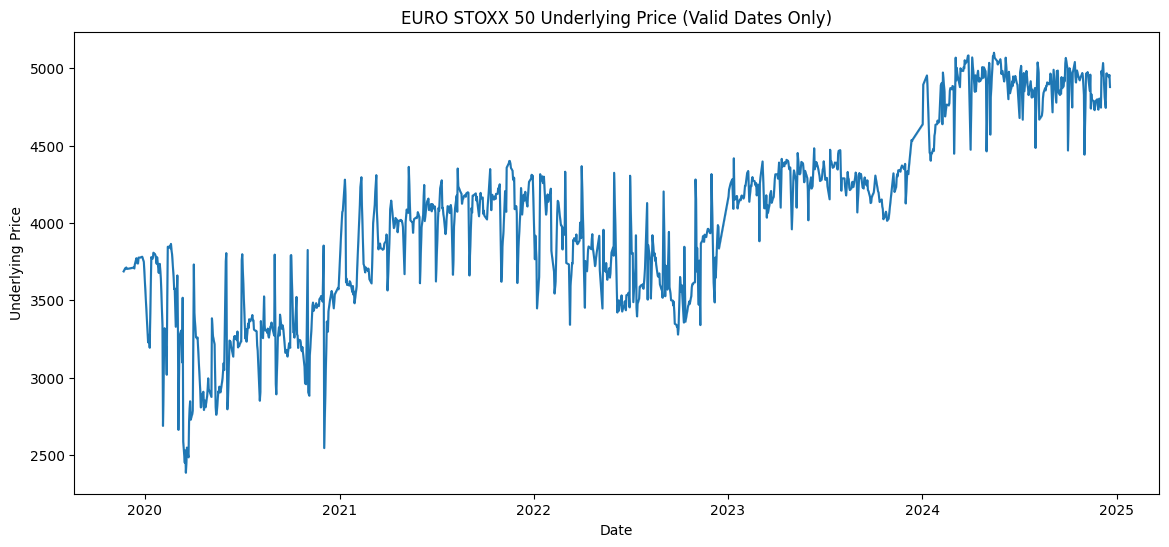

In [111]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=final_merged_df, x='Date', y='Underlying_Price')
plt.title('EURO STOXX 50 Underlying Price (Valid Dates Only)')
plt.xlabel('Date')
plt.ylabel('Underlying Price')
plt.show()


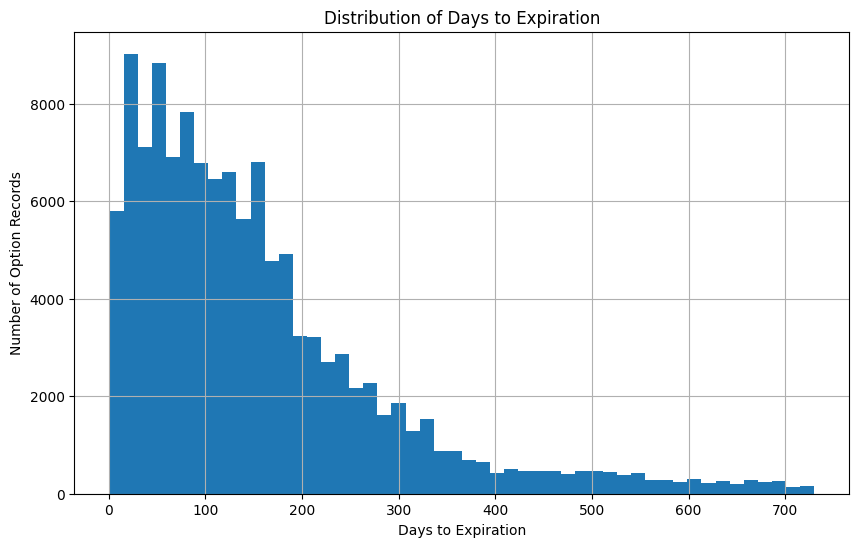

count    121233.000000
mean        155.401236
std         134.328621
min           1.000000
25%          59.000000
50%         121.000000
75%         206.000000
max         730.000000
Name: Days_to_Expiration, dtype: float64
0.25     59.0
0.50    121.0
0.75    206.0
0.90    324.0
0.99    647.0
Name: Days_to_Expiration, dtype: float64


In [112]:
import matplotlib.pyplot as plt

# Histogram of days to expiration
plt.figure(figsize=(10,6))
final_merged_df['Days_to_Expiration'].hist(bins=50)
plt.title('Distribution of Days to Expiration')
plt.xlabel('Days to Expiration')
plt.ylabel('Number of Option Records')
plt.show()

# Quantile statistics
print(final_merged_df['Days_to_Expiration'].describe())
print(final_merged_df['Days_to_Expiration'].quantile([0.25, 0.5, 0.75, 0.9, 0.99]))


# Merge with ECB data

## Link to data https://www.suomenpankki.fi/en/statistics/data-and-charts/interest-rates/charts/korot_kuviot_en/euriborkorot_pv_chrt_en/

## Importing and Merging Rate dataset

In [113]:
rates = pd.read_csv('/Users/danielnavia/Documents/Thesis Foolery/ Databases Raw/ECB Data Rates 2019-2025.csv')

cols = ['Date', '1W', '1M', '3M', '6M', '12M']
rates.columns = cols + list(rates.columns[len(cols):])  # Drop spurious columns at end if any
rates['Date'] = pd.to_datetime(rates['Date'], dayfirst=True, errors='coerce')


/var/folders/dd/8bs90_x11fxby7j1952zh8m00000gn/T/ipykernel_61286/2591542825.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rates['Date'] = pd.to_datetime(rates['Date'], dayfirst=True, errors='coerce')


In [114]:
rates.dtypes

Date          datetime64[ns]
1W                   float64
1M                   float64
3M                   float64
6M                   float64
12M                  float64
Unnamed: 6           float64
Unnamed: 7           float64
dtype: object

In [115]:
rates = rates.drop(columns=[col for col in rates.columns if 'Unnamed' in col])

In [116]:
# Remove NaT dates
rates = rates.dropna(subset=['Date'])

# Remove duplicate dates from RATES (keep only first occurrence)
rates = rates.drop_duplicates(subset=['Date'], keep='first')
print(f"Rates dataframe shape after cleaning: {rates.shape}")

# 2. Perform a clean LEFT merge
# First, drop any existing rate columns from previous attempts
cols_to_drop = [col for col in final_merged_df.columns if col in ['1W', '1M', '3M', '6M', '12M', 'Rate_Tenor', 'Risk_Free_Rate']]
final_merged_df = final_merged_df.drop(columns=cols_to_drop, errors='ignore')

# Now do a clean LEFT merge
final_merged_df = final_merged_df.merge(
    rates[['Date', '1W', '1M', '3M', '6M', '12M']],
    on='Date',
    how='left'
)

# 3. Verify the merge preserved your exact number of option records
print(f"Original options shape: {121233}")  # Your original count
print(f"Shape after merge: {final_merged_df.shape}")

# 4. Handle any missing rate values
missing_rate_dates = final_merged_df.loc[final_merged_df['1M'].isnull(), 'Date'].unique()
print(f"Dates with missing rates: {len(missing_rate_dates)}")

# If there are missing rates, fill them with nearby values
if len(missing_rate_dates) > 0:
    # Create a temporary dataframe with all dates
    all_dates = pd.DataFrame({'Date': pd.date_range(
        start=min(final_merged_df['Date'].min(), rates['Date'].min()),
        end=max(final_merged_df['Date'].max(), rates['Date'].max()),
        freq='D'
    )})
    
    # Merge rates with all dates
    rates_filled = all_dates.merge(rates, on='Date', how='left')
    
    # Fill forward (and backward) values
    for col in ['1W', '1M', '3M', '6M', '12M']:
        rates_filled[col] = rates_filled[col].ffill().bfill()
    
    # Merge the filled rates with your options
    final_merged_df = final_merged_df.drop(columns=['1W', '1M', '3M', '6M', '12M'])
    final_merged_df = final_merged_df.merge(
        rates_filled[['Date', '1W', '1M', '3M', '6M', '12M']],
        on='Date',
        how='left'
    )
rates.dtypes

Rates dataframe shape after cleaning: (1437, 6)
Original options shape: 121233
Shape after merge: (121233, 18)
Dates with missing rates: 7


Date    datetime64[ns]
1W             float64
1M             float64
3M             float64
6M             float64
12M            float64
dtype: object

In [117]:
# Identify the dates with missing rates
missing_dates = final_merged_df[final_merged_df['1M'].isnull()]['Date'].unique()
print("Dates with missing rates:")
for date in sorted(missing_dates):
    print(date.strftime('%Y-%m-%d'))
    
# Sort the dataframe by date for proper filling
temp_rates = final_merged_df[['Date', '1W', '1M', '3M', '6M', '12M']].drop_duplicates().sort_values('Date')

# Forward fill and then backward fill to ensure no gaps
for col in ['1W', '1M', '3M', '6M', '12M']:
    temp_rates[col] = temp_rates[col].ffill().bfill()

# Merge the filled rates back
final_merged_df = final_merged_df.drop(columns=['1W', '1M', '3M', '6M', '12M'])
final_merged_df = final_merged_df.merge(temp_rates, on='Date', how='left')

# Verify no more missing rates
print(f"Missing values after filling: {final_merged_df[['1W', '1M', '3M', '6M', '12M']].isnull().sum().sum()}")

Dates with missing rates:
Missing values after filling: 0


In [133]:
# Assign the appropriate rate tenor
def pick_tenor(days):
    if days <= 7:
        return '1W'
    elif days <= 30:
        return '1M'
    elif days <= 90:
        return '3M'
    elif days <= 180:
        return '6M'
    else:
        return '12M'

final_merged_df['Rate_Tenor'] = final_merged_df['Days_to_Expiration'].apply(pick_tenor)

# Extract the appropriate risk-free rate 
final_merged_df['Risk_Free_Rate'] = final_merged_df.apply(lambda row: row[row['Rate_Tenor']], axis=1)

# Check the distribution
tenor_counts = final_merged_df['Rate_Tenor'].value_counts()
print("\nTenor assignment distribution:")
print(tenor_counts)

# Show a sample 
print("\nSample of options with assigned risk-free rates:")
print(final_merged_df[['Date', 'Option_Type', 'Strike', 'Days_to_Expiration', 
                      'Rate_Tenor', 'Risk_Free_Rate']].head(10))


Tenor assignment distribution:
Rate_Tenor
6M     39225
12M    36507
3M     30675
1M     12363
1W      2463
Name: count, dtype: int64

Sample of options with assigned risk-free rates:
        Date Option_Type  Strike  Days_to_Expiration Rate_Tenor  \
0 2019-11-22        CALL  2000.0                  56         3M   
1 2019-11-22         PUT  2000.0                  56         3M   
2 2019-11-22        CALL  2500.0                  56         3M   
3 2019-11-22         PUT  2500.0                  56         3M   
4 2019-11-22        CALL  3000.0                  56         3M   
5 2019-11-22         PUT  3000.0                  56         3M   
6 2019-11-22        CALL  3500.0                  56         3M   
7 2019-11-22         PUT  3500.0                  56         3M   
8 2019-11-22        CALL  4000.0                  56         3M   
9 2019-11-22         PUT  4000.0                  56         3M   

   Risk_Free_Rate  
0          -0.403  
1          -0.403  
2          -0.403 

In [134]:
# Load the dividend history CSV
dividend_df = pd.read_csv('/Users/danielnavia/Documents/Thesis Foolery/ Databases Raw/EUEA_dividend_history.csv')


In [135]:
def add_dividend_yield(options_df, dividend_df):
    """
    For each option record, sum all dividends with ex-dates between 'Date' and 'Expiration_Date',
    then compute the continuous dividend yield for BSM.
    Adds columns: 'Total_Expected_Dividend' and 'Dividend_Yield'.
    """
    options_df = options_df.copy()
    options_df['Date'] = pd.to_datetime(options_df['Date'])
    options_df['Expiration_Date'] = pd.to_datetime(options_df['Expiration_Date'])
    dividend_df['Ex_Dividend_Date'] = pd.to_datetime(dividend_df['Ex_Dividend_Date'])

    # Pre-sort for efficiency
    dividend_df_sorted = dividend_df.sort_values('Ex_Dividend_Date')

    def sum_dividends(row):
        mask = (dividend_df_sorted['Ex_Dividend_Date'] > row['Date']) & \
               (dividend_df_sorted['Ex_Dividend_Date'] <= row['Expiration_Date'])
        return dividend_df_sorted.loc[mask, 'Dividend_Amount_EUR'].sum()

    # Vectorized apply for total expected dividends
    options_df['Total_Expected_Dividend'] = options_df.apply(sum_dividends, axis=1)

    # Calculate continuous dividend yield for BSM
    def calc_div_yield(row):
        if row['T'] > 0 and row['Underlying_Price'] > 0:
            return row['Total_Expected_Dividend'] / (row['Underlying_Price'] * row['T'])
        else:
            return 0.0

    options_df['Dividend_Yield'] = options_df.apply(calc_div_yield, axis=1)
    return options_df


In [136]:
final_merged_df = add_dividend_yield(final_merged_df, dividend_df)

In [125]:
# Pick a random sample of options
sample = final_merged_df.sample(5, random_state=42)[['Date', 'Expiration_Date', 'Total_Expected_Dividend']]

for idx, row in sample.iterrows():
    mask = (dividend_df['Ex_Dividend_Date'] > row['Date']) & \
           (dividend_df['Ex_Dividend_Date'] <= row['Expiration_Date'])
    manual_sum = dividend_df.loc[mask, 'Dividend_Amount_EUR'].sum()
    print(f"Option from {row['Date'].date()} to {row['Expiration_Date'].date()}:")
    print(f"  Calculated: {row['Total_Expected_Dividend']:.4f}, Manual: {manual_sum:.4f}")
    print('-'*40)


Option from 2021-01-07 to 2022-12-16:
  Calculated: 2.0283, Manual: 2.0283
----------------------------------------
Option from 2021-12-29 to 2022-02-18:
  Calculated: 0.1022, Manual: 0.1022
----------------------------------------
Option from 2022-02-02 to 2022-11-18:
  Calculated: 1.1310, Manual: 1.1310
----------------------------------------
Option from 2024-10-16 to 2024-12-20:
  Calculated: 0.1238, Manual: 0.1238
----------------------------------------
Option from 2020-04-24 to 2020-12-18:
  Calculated: 0.6716, Manual: 0.6716
----------------------------------------


In [126]:
print("Dividend Yield stats:")
print(final_merged_df['Dividend_Yield'].describe())


Dividend Yield stats:
count    121233.000000
mean          0.000380
std           0.000773
min           0.000000
25%           0.000145
50%           0.000303
75%           0.000454
max           0.048224
Name: Dividend_Yield, dtype: float64


In [127]:
no_div_mask = final_merged_df['Total_Expected_Dividend'] == 0
print("Options with no expected dividends:", no_div_mask.sum())
print(final_merged_df.loc[no_div_mask, ['Date', 'Expiration_Date', 'T', 'Dividend_Yield']].head())


Options with no expected dividends: 16916
        Date Expiration_Date         T  Dividend_Yield
0 2019-11-22      2020-01-17  0.153425             0.0
1 2019-11-22      2020-01-17  0.153425             0.0
2 2019-11-22      2020-01-17  0.153425             0.0
3 2019-11-22      2020-01-17  0.153425             0.0
4 2019-11-22      2020-01-17  0.153425             0.0


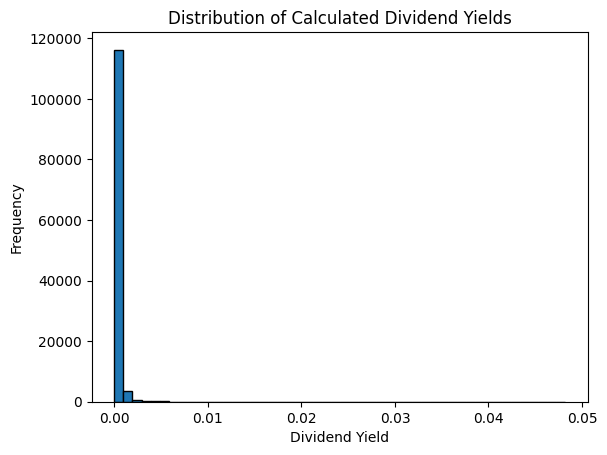

In [128]:
import matplotlib.pyplot as plt
plt.hist(final_merged_df['Dividend_Yield'], bins=50, edgecolor='k')
plt.title('Distribution of Calculated Dividend Yields')
plt.xlabel('Dividend Yield')
plt.ylabel('Frequency')
plt.show()


In [129]:
print("NaNs in Dividend_Yield:", final_merged_df['Dividend_Yield'].isna().sum())
print("Negative Dividend_Yield:", (final_merged_df['Dividend_Yield'] < 0).sum())


NaNs in Dividend_Yield: 0
Negative Dividend_Yield: 0


## Save to CSV

In [80]:
#final_merged_df.to_csv('/Users/danielnavia/Documents/Thesis Foolery/options_with_underlying&rates.csv', index=False)

# CH 1

In [58]:
#Salva in this part you have to include the dataset that i have sent you along side this code so its works onwards, specially the blackscholes formula
final_merged_df = pd.read_csv("Insert here the ")

final_merged_df.head(16)

,Date,Option_Type,Expiration,Strike,IMPLIED_VOL.,PRICE,T,Expiration_Date,Days_to_Expiration,Underlying_Price,Volume,Low,High,1W,1M,3M,6M,12M,Rate_Tenor,Risk_Free_Rate
0,2019-11-22,CALL,JAN20,2000.0,0.7689,1677.7,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
1,2019-11-22,PUT,JAN20,2000.0,0.4869,0.1,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
2,2019-11-22,CALL,JAN20,2500.0,0.5039,1177.4,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
3,2019-11-22,PUT,JAN20,2500.0,0.3167,0.1,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
4,2019-11-22,CALL,JAN20,3000.0,0.2991,678.7,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
5,2019-11-22,PUT,JAN20,3000.0,0.2411,1.8,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
6,2019-11-22,CALL,JAN20,3500.0,0.1602,201.1,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
7,2019-11-22,PUT,JAN20,3500.0,0.1507,24.7,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
8,2019-11-22,CALL,JAN20,4000.0,0.1004,0.8,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403
9,2019-11-22,PUT,JAN20,4000.0,0.0746,324.7,0.153425,2020-01-17,56,3687.320068,31889400.0,3682.219971,3709.879883,-0.47,-0.445,-0.403,-0.335,-0.277,3M,-0.403


In [137]:
final_merged_df.shape

(121233, 23)

In [138]:
final_merged_df.dtypes

Date                       datetime64[ns]
Option_Type                        object
Expiration                         object
Strike                            float64
IMPLIED_VOL.                      float64
PRICE                             float64
T                                 float64
Expiration_Date            datetime64[ns]
Days_to_Expiration                  int64
Underlying_Price                  float64
Volume                            float64
Low                               float64
High                              float64
1W                                float64
1M                                float64
3M                                float64
6M                                float64
12M                               float64
Dividends_to_Expiry               float64
Dividend_Yield                    float64
Total_Expected_Dividend           float64
Rate_Tenor                         object
Risk_Free_Rate                    float64
dtype: object

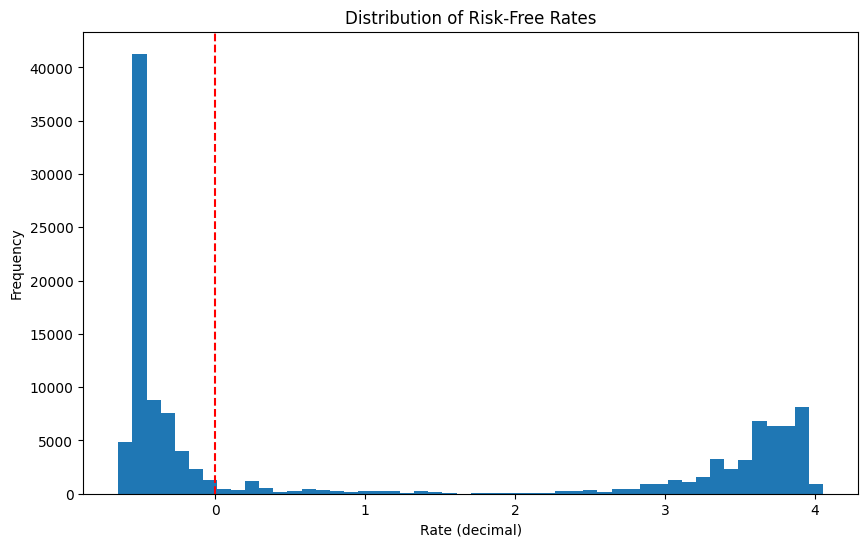

Min rate: -0.648
Max rate: 4.055
Options with negative rates: 70025


In [139]:
# Analyze risk-free rate distribution
plt.figure(figsize=(10, 6))
plt.hist(final_merged_df['Risk_Free_Rate'], bins=50)
plt.title('Distribution of Risk-Free Rates')
plt.xlabel('Rate (decimal)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

print(f"Min rate: {final_merged_df['Risk_Free_Rate'].min()}")
print(f"Max rate: {final_merged_df['Risk_Free_Rate'].max()}")
print(f"Options with negative rates: {(final_merged_df['Risk_Free_Rate'] < 0).sum()}")

# PART 1: Implementing Black Scholes Model

In [140]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

## Definition of formulas

In [141]:
from scipy.stats import norm
import numpy as np

def bsm_d1(S, K, T, r, q, sigma):
    """
    S : Underlying asset price
    K : Strike price
    T : Time to expiration (years)
    r : Risk-free rate (annualized)
    q : Continuous dividend yield (annualized)
    sigma : Implied volatility (annualized)
    """
    if sigma <= 0 or T <= 0:
        return np.nan
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def bsm_d2(S, K, T, r, q, sigma):
    if sigma <= 0 or T <= 0:
        return np.nan
    return bsm_d1(S, K, T, r, q, sigma) - sigma * np.sqrt(T)

def bsm_call_price(S, K, T, r, q, sigma):
    if T <= 0:
        return max(0, S - K)
    d1 = bsm_d1(S, K, T, r, q, sigma)
    d2 = bsm_d2(S, K, T, r, q, sigma)
    if np.isnan(d1) or np.isnan(d2):
        return np.nan
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def bsm_put_price(S, K, T, r, q, sigma):
    if T <= 0:
        return max(0, K - S)
    d1 = bsm_d1(S, K, T, r, q, sigma)
    d2 = bsm_d2(S, K, T, r, q, sigma)
    if np.isnan(d1) or np.isnan(d2):
        return np.nan
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)


def bsm_d2(S, K, T, r, sigma):
    """
    Calculate d2 parameter
    Parameters:
    -----------
    S, K, T, r, sigma : same as in d1 
    Returns:
    --------
    float
        d2 parameter
    """
    if sigma <= 0 or T <= 0:
        return np.nan
        
    return bsm_d1(S, K, T, r, sigma) - sigma * np.sqrt(T)

def bsm_call_price(S, K, T, r, sigma):
    """
    Parameters:
    -----------
    S, K, T, r, sigma : same as in d1
    Returns:
    --------
    call option price
    """
    if T <= 0:
        # Handle expired options
        return max(0, S - K)
    
    d1 = bsm_d1(S, K, T, r, sigma)
    d2 = bsm_d2(S, K, T, r, sigma)
    
    if np.isnan(d1) or np.isnan(d2):
        return np.nan
        
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def bsm_put_price(S, K, T, r, sigma):
    """
    Calculate put option
    
    Parameters:
    -----------
    S, K, T, r, sigma : same as in d1 function
    
    Returns:
    --------
        Theoretical put option price
    """
    if T <= 0:
        # Handle expired options
        return max(0, K - S)
    
    d1 = bsm_d1(S, K, T, r, sigma)
    d2 = bsm_d2(S, K, T, r, sigma)
    
    if np.isnan(d1) or np.isnan(d2):
        return np.nan
        
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

For the D1 and D2 terms: 
d1 combines moneyness (log(S/K)), interest rate effects, and volatility effects
d2 is just d1 adjusted downward by one standard deviation term
I've added error handling to catch cases like zero volatility or expired options that could break my calculations.

For option pricing there is Call and Put, which would then be implemented using the column Option Type in the final_merged_df

For *Call*: S * N(d1): The expected value of receiving the underlying asset if the option expires in-the-money
K * exp(-r * T) * N(d2): The expected present value of paying the strike price if the option expires in-the-money
The function also handles the special case of expired options (T ≤ 0) by returning their intrinsic value max(0, S - K), and handles calculation errors by returning NaN if either d1 or d2 is invalid.

For *Put*: K * exp(-r * T) * N(-d2): The expected present value of receiving the strike price if the option expires in-the-money
S * N(-d1): The expected value of giving up the underlying asset if the option expires in-the-money


In [64]:
def bsm_delta(S, K, T, r, sigma, option_type):
    """
    Calculate Delta
    Parameters:
    -----------
    S, K, T, r, sigma : same as in d1 function
    option_type : str
        'CALL' or 'PUT'
    --------
        Delta
    """
    if T <= 0:
        # Handle expired options
        if option_type == 'CALL':
            return 1.0 if S > K else 0.0
        else:  # PUT
            return -1.0 if S < K else 0.0
    
    d1 = bsm_d1(S, K, T, r, sigma)
    
    if np.isnan(d1):
        return np.nan
        
    if option_type == 'CALL':
        return norm.cdf(d1)
    else:  # PUT
        return norm.cdf(d1) - 1.0

def bsm_gamma(S, K, T, r, sigma):
    """
    Calculate Gamma
    Gamma is the same for both calls and puts.
    
    Parameters:
    -----------
    S, K, T, r, sigma : same as in d1 function
    
    Returns:
    --------
        Gamma
    """
    if T <= 0:
        return 0.0
    
    d1 = bsm_d1(S, K, T, r, sigma)
    
    if np.isnan(d1):
        return np.nan
        
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def bsm_vega(S, K, T, r, sigma):
    """
    Calculate Vega
    Vega is the same for both calls and puts.
    
    Parameters:
    -----------
    S, K, T, r, sigma : same as in d1
    
    Returns:
    --------
        Vega value (as percentage points)
    """
    if T <= 0:
        return 0.0
    
    d1 = bsm_d1(S, K, T, r, sigma)
    
    if np.isnan(d1):
        return np.nan
        
    return S * np.sqrt(T) * norm.pdf(d1) / 100

Remember:


*Delta* measures the rate of change in option price with respect to changes in the underlying asset's price. It represents the hedge ratio for creating a risk-neutral position.

*Gamma* measures the rate of change in delta with respect to changes in the underlying price. It indicates how stable the delta hedge is and how frequently rebalancing may be required.

*Vega* measures the sensitivity of the option price to changes in implied volatility. It indicates how much an option's theoretical value changes when volatility increases by 1 percentage point.



In [142]:
def calculate_bsm_values(df):
    """
    Apply BSM model to calculate theoretical prices and Greeks for all options.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing options data with required columns
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with additional columns for BSM values
    """
    S = df['Underlying_Price'].values
    K = df['Strike'].values
    T = df['T'].values
    r = df['Risk_Free_Rate'].values
    sigma = df['IMPLIED_VOL.'].values
    option_type = df['Option_Type'].values
    
    n = len(df)
    theoretical_price = np.zeros(n)
    delta = np.zeros(n)
    gamma = np.zeros(n)
    vega = np.zeros(n)
    
    # Calculate values for each option
    for i in range(n):
        if option_type[i] == 'CALL':
            theoretical_price[i] = bsm_call_price(S[i], K[i], T[i], r[i], sigma[i])
            delta[i] = bsm_delta(S[i], K[i], T[i], r[i], sigma[i], 'CALL')
        else:  # PUT
            theoretical_price[i] = bsm_put_price(S[i], K[i], T[i], r[i], sigma[i])
            delta[i] = bsm_delta(S[i], K[i], T[i], r[i], sigma[i], 'PUT')
        
        gamma[i] = bsm_gamma(S[i], K[i], T[i], r[i], sigma[i])
        vega[i] = bsm_vega(S[i], K[i], T[i], r[i], sigma[i])
    
    # Add values to dataframe
    df = df.copy()
    df['BSM_Price'] = theoretical_price
    df['BSM_Delta'] = delta
    df['BSM_Gamma'] = gamma
    df['BSM_Vega'] = vega
    
    # Calculate error (market vs model)
    df['Price_Error'] = df['PRICE'] - df['BSM_Price']
    df['Price_Error_Pct'] = df['Price_Error'] / df['PRICE'] * 100
    
    return df


## Aplication of formulas

In [150]:
final_merged_df_bsm = calculate_bsm_values(final_merged_df)

print(final_merged_df_bsm[['Date', 'Option_Type', 'Strike', 'PRICE', 
                          'BSM_Price', 'BSM_Delta', 'BSM_Gamma', 'BSM_Vega']].head(10))

# Check for any calculation issues
nan_count = final_merged_df_bsm['BSM_Price'].isna().sum()
print(f"\nNumber of options with NaN BSM prices: {nan_count}")

if nan_count > 0:
    # Identify problematic records
    nan_records = final_merged_df_bsm[final_merged_df_bsm['BSM_Price'].isna()]
    print("\nSample of records with NaN BSM prices:")
    print(nan_records[['Date', 'Option_Type', 'Strike', 'IMPLIED_VOL.', 'T', 'Risk_Free_Rate']].head())


TypeError: bsm_call_price() missing 1 required positional argument: 'sigma'

In [151]:
final_merged_df_bsm.head(3)

NameError: name 'final_merged_df_bsm' is not defined

## Moneyness

In [68]:
if 'Moneyness' not in final_merged_df_bsm.columns:
    final_merged_df_bsm['Moneyness'] = final_merged_df_bsm['Strike'] / final_merged_df_bsm['Underlying_Price']
    
    print("Moneyness calculated and added to dataframe.")

print("\nMoneyness summary statistics:")
print(final_merged_df_bsm['Moneyness'].describe())



Moneyness calculated and added to dataframe.

Moneyness summary statistics:
count    121233.000000
mean          0.969057
std           0.327719
min           0.392088
25%           0.706478
50%           0.946808
75%           1.199292
max           2.514859
Name: Moneyness, dtype: float64


25% of options have strikes at least 29% below the underlying price
50% of options have strikes within about 5% of the underlying price (near-the-money)
75% of options have strikes within 20% above the underlying price

## Money Status

In [69]:
conditions = [
    ((final_merged_df_bsm['Option_Type'] == 'CALL') & (final_merged_df_bsm['Moneyness'] < 0.95)),
    ((final_merged_df_bsm['Option_Type'] == 'CALL') & (final_merged_df_bsm['Moneyness'] > 1.05)),
    ((final_merged_df_bsm['Option_Type'] == 'PUT') & (final_merged_df_bsm['Moneyness'] > 1.05)),
    ((final_merged_df_bsm['Option_Type'] == 'PUT') & (final_merged_df_bsm['Moneyness'] < 0.95))
]
choices = ['ITM', 'OTM', 'ITM', 'OTM']
final_merged_df_bsm['Money_Status'] = np.select(conditions, choices, default='ATM')


Money Status Distribution:
Money_Status
ATM    11650
ITM    54501
OTM    55082
Name: count, dtype: int64


/var/folders/dd/8bs90_x11fxby7j1952zh8m00000gn/T/ipykernel_51090/2224300735.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=money_status_counts.index, y=money_status_counts.values, palette=colors.values())


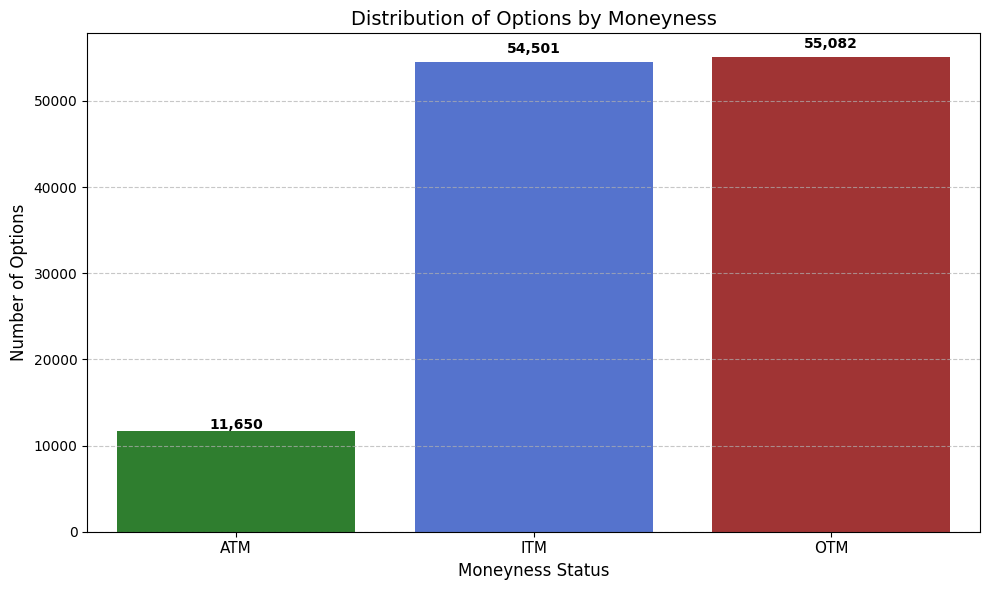

<Figure size 1200x700 with 0 Axes>

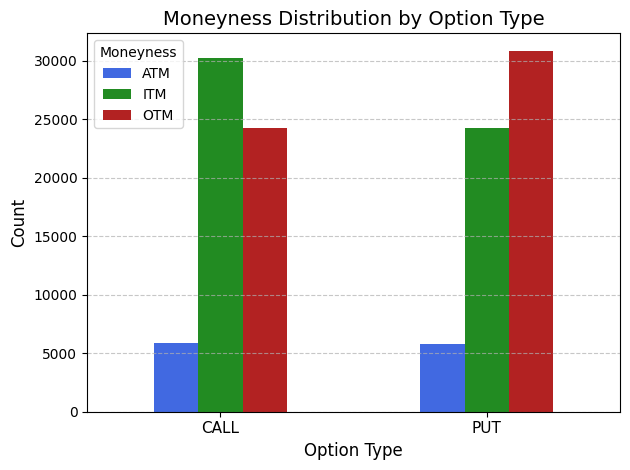

In [70]:
# Get the counts
money_status_counts = final_merged_df_bsm['Money_Status'].value_counts().sort_index()
print("\nMoney Status Distribution:")
print(money_status_counts)

# Create bar chart with custom colors
plt.figure(figsize=(10, 6))
colors = {'ITM': 'forestgreen', 'ATM': 'royalblue', 'OTM': 'firebrick'}
ax = sns.barplot(x=money_status_counts.index, y=money_status_counts.values, palette=colors.values())

# Add count labels on top of bars
for i, v in enumerate(money_status_counts):
    ax.text(i, v + (v*0.02), f"{v:,}", ha='center', fontweight='bold')

plt.title('Distribution of Options by Moneyness', fontsize=14)
plt.xlabel('Moneyness Status', fontsize=12)
plt.ylabel('Number of Options', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Additional: Breakdown by option type
plt.figure(figsize=(12, 7))
option_money_status = pd.crosstab(final_merged_df_bsm['Option_Type'], final_merged_df_bsm['Money_Status'])
option_money_status.plot(kind='bar', stacked=False, color=[colors[x] for x in option_money_status.columns])
plt.title('Moneyness Distribution by Option Type', fontsize=14)
plt.xlabel('Option Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.legend(title='Moneyness')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Checking BSM

BSM Price Error Statistics:
count    121233.000000
mean       -484.980841
std        1218.021985
min       -8342.456731
25%        -741.161328
50%           0.015945
75%          73.900000
max        2163.755471
Name: Price_Error, dtype: float64

BSM Percentage Price Error Statistics:
count    121233.000000
mean         -2.233074
std          86.762895
min        -100.000000
25%        -100.000000
50%           0.418806
75%          99.374209
max         100.000000
Name: Price_Error_Pct, dtype: float64


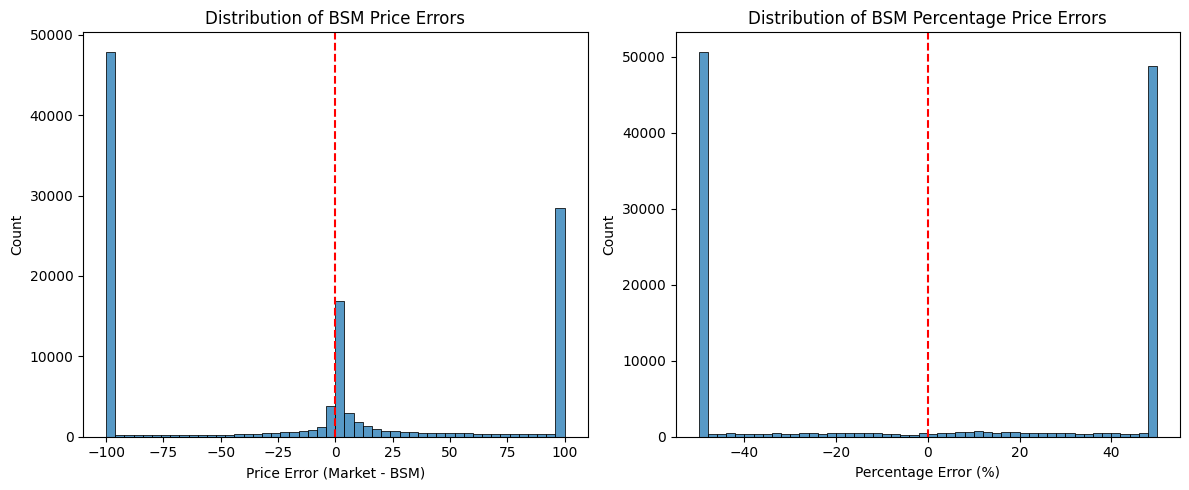

In [71]:
print("BSM Price Error Statistics:")
print(final_merged_df_bsm['Price_Error'].describe())
print("\nBSM Percentage Price Error Statistics:")
print(final_merged_df_bsm['Price_Error_Pct'].clip(-100, 100).describe())

# Error distribution histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(final_merged_df_bsm['Price_Error'].clip(-100, 100), bins=50)
plt.title('Distribution of BSM Price Errors')
plt.xlabel('Price Error (Market - BSM)')
plt.axvline(x=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(final_merged_df_bsm['Price_Error_Pct'].clip(-50, 50), bins=50)
plt.title('Distribution of BSM Percentage Price Errors')
plt.xlabel('Percentage Error (%)')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()



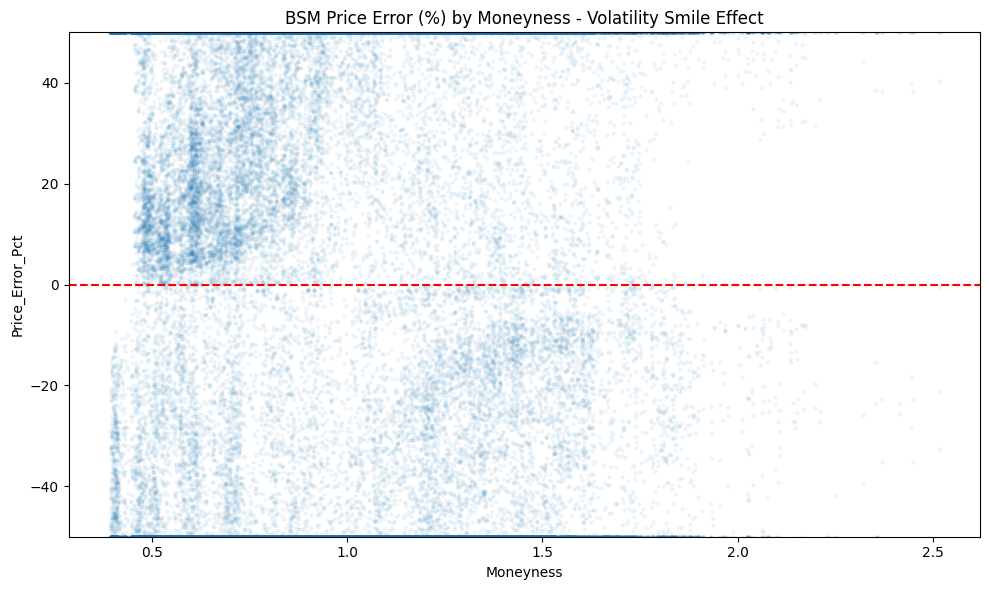

In [72]:
# Create a scatter plot moneyness
plt.figure(figsize=(10, 6))
plt.scatter(final_merged_df_bsm['Moneyness'], 
           final_merged_df_bsm['Price_Error_Pct'].clip(-50, 50),
           alpha=0.05, s=5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('BSM Price Error (%) by Moneyness - Volatility Smile Effect')
plt.xlabel('Moneyness (Strike/Underlying)')
plt.ylabel('Price Error (%)')
plt.ylim(-50, 50)

# Add a smoothed trend line to highlight the pattern
sns.regplot(x='Moneyness', y='Price_Error_Pct', 
           data=final_merged_df_bsm,
           scatter=False, 
           lowess=True,  # Locally weighted regression
           line_kws={'color': 'black', 'linewidth': 2})
plt.tight_layout()
plt.show()


In [73]:
# Separate positive and negative rate environments
positive_rates = final_merged_df_bsm[final_merged_df_bsm['Risk_Free_Rate'] >= 0]
negative_rates = final_merged_df_bsm[final_merged_df_bsm['Risk_Free_Rate'] < 0]

# Compare BSM performance in both environments
for df, name in [(positive_rates, "Positive Rates"), (negative_rates, "Negative Rates")]:
    print(f"\nBSM Price Error Statistics - {name}:")
    print(df['Price_Error_Pct'].clip(-100, 100).describe())



BSM Price Error Statistics - Positive Rates:
count    51208.000000
mean         3.870008
std         93.190507
min       -100.000000
25%       -100.000000
50%          9.337186
75%        100.000000
max        100.000000
Name: Price_Error_Pct, dtype: float64

BSM Price Error Statistics - Negative Rates:
count    70025.000000
mean        -6.696146
std         81.454906
min       -100.000000
25%       -100.000000
50%         -1.161614
75%         82.325347
max        100.000000
Name: Price_Error_Pct, dtype: float64


## Benchmark

In [74]:
final_merged_df_bsm

,Date,Option_Type,Expiration,Strike,IMPLIED_VOL.,PRICE,T,Expiration_Date,Days_to_Expiration,Underlying_Price,...,Rate_Tenor,Risk_Free_Rate,BSM_Price,BSM_Delta,BSM_Gamma,BSM_Vega,Price_Error,Price_Error_Pct,Moneyness,Money_Status
0,2019-11-22,CALL,JAN20,2000.0,0.7689,1677.7,0.153425,2020-01-17,56,3687.320068,...,3M,-0.403,1570.937601,0.975952,5.094131e-05,8.170654e-01,106.762399,6.363617,0.542399,ITM
1,2019-11-22,PUT,JAN20,2000.0,0.4869,0.1,0.153425,2020-01-17,56,3687.320068,...,3M,-0.403,0.305080,-0.001447,6.714048e-06,6.819319e-02,-0.205080,-205.080486,0.542399,OTM
2,2019-11-22,CALL,JAN20,2500.0,0.5039,1177.4,0.153425,2020-01-17,56,3687.320068,...,3M,-0.403,1040.404669,0.960312,1.176553e-04,1.236724e+00,136.995331,11.635411,0.677999,ITM
3,2019-11-22,PUT,JAN20,2500.0,0.3167,0.1,0.153425,2020-01-17,56,3687.320068,...,3M,-0.403,0.508808,-0.003506,2.301198e-05,1.520264e-01,-0.408808,-408.808337,0.677999,OTM
4,2019-11-22,CALL,JAN20,3000.0,0.2991,678.7,0.153425,2020-01-17,56,3687.320068,...,3M,-0.403,517.011817,0.901755,4.010285e-04,2.502122e+00,161.688183,23.823218,0.813599,ITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121228,2024-12-19,CALL,DEC24,5000.0,0.1687,0.3,0.002740,2024-12-20,1,4879.000000,...,1W,2.895,0.510867,0.030626,1.606617e-03,1.767650e-01,-0.210867,-70.288970,1.024800,ATM
121229,2024-12-19,PUT,DEC24,5000.0,0.1060,118.3,0.002740,2024-12-20,1,4879.000000,...,1W,2.895,81.510289,-0.998573,1.722426e-04,1.190735e-02,36.789711,31.098657,1.024800,ATM
121230,2024-12-19,CALL,DEC24,5500.0,0.6104,0.1,0.002740,2024-12-20,1,4879.000000,...,1W,2.895,0.009577,0.000245,5.886001e-06,2.343169e-03,0.090423,90.422676,1.127280,OTM
121231,2024-12-19,PUT,DEC24,5500.0,0.2021,617.9,0.002740,2024-12-20,1,4879.000000,...,1W,2.895,577.549255,-1.000000,4.212128e-27,5.551836e-25,40.350745,6.530303,1.127280,ITM


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For the purpose of this simulation, filter for an ATM call.
# (Here we use a simple moneyness criterion: between 0.95 and 1.05)
atm_calls = final_merged_df_bsm[(final_merged_df_bsm['Option_Type'] == 'CALL') &
                                (final_merged_df_bsm['Moneyness'] >= 0.95) &
                                (final_merged_df_bsm['Moneyness'] <= 1.05)]

# Select one contract – for example, choose the one with the earliest expiration
selected_option = atm_calls.sort_values('Expiration_Date').iloc[0]
print("Selected Option Details:")
print(selected_option[['Date', 'Expiration_Date', 'Strike', 'Underlying_Price', 'BSM_Delta', 'PRICE']])


Selected Option Details:
Date                2020-01-27 00:00:00
Expiration_Date     2020-02-21 00:00:00
Strike                           3500.0
Underlying_Price            3677.840088
BSM_Delta                      0.641525
PRICE                             192.0
Name: 3237, dtype: object


In [76]:
# Get the time series for the selected option contract.
option_series = final_merged_df_bsm[(final_merged_df_bsm['Option_Type'] == 'CALL') &
                                    (final_merged_df_bsm['Strike'] == selected_option['Strike']) &
                                    (final_merged_df_bsm['Expiration_Date'] == selected_option['Expiration_Date'])]
option_series = option_series.sort_values('Date').reset_index(drop=True)
print("Number of observations for the selected option:", len(option_series))


Number of observations for the selected option: 47


In [77]:
# Initialize the simulation.
simulation = []  # List to store daily simulation results
# Use the first observation as the starting point.
prev_row = option_series.iloc[0].copy()
prev_hedge = prev_row['BSM_Delta']      # Hedge needed on day 1 (shares)
prev_underlying_price = prev_row['Underlying_Price']
prev_option_price = prev_row['PRICE']
cumulative_pnl = 0

# Loop through each day in the time series.
for idx, row in option_series.iterrows():
    current_date = row['Date']
    current_underlying_price = row['Underlying_Price']
    current_option_price = row['PRICE']
    current_delta = row['BSM_Delta']
    
    # Calculate the underlying PnL: we hold the previous hedge position
    underlying_pnl = prev_hedge * (current_underlying_price - prev_underlying_price)
    
    # For a short option position, profit is gained when the price drops.
    # Option PnL is computed as the price change between the previous and current day.
    option_pnl = (prev_option_price - current_option_price)
    
    # The overall daily PnL is the sum of the underlying PnL and the option's PnL.
    daily_pnl = underlying_pnl + option_pnl
    cumulative_pnl += daily_pnl
    
    # Record the details for this day.
    simulation.append({
        'Date': current_date,
        'Underlying_Price': current_underlying_price,
        'Option_Price': current_option_price,
        'BSM_Delta': current_delta,
        'Hedge_Position': prev_hedge,  # Hedge position before today's update
        'Underlying_PnL': underlying_pnl,
        'Option_PnL': option_pnl,
        'Daily_PnL': daily_pnl,
        'Cumulative_PnL': cumulative_pnl
    })
    
    # Update the hedge position and prices for the next period.
    # Here we assume that the hedge is rebalanced at the close of each day to the new BSM delta.
    prev_hedge = current_delta
    prev_underlying_price = current_underlying_price
    prev_option_price = current_option_price

# Create a DataFrame to store the simulation results.
simulation_df = pd.DataFrame(simulation)
print(simulation_df.head())


        Date  Underlying_Price  Option_Price  BSM_Delta  Hedge_Position  \
0 2019-11-22       3687.320068         214.4   0.363195        0.363195   
1 2019-11-25       3707.679932         231.4   0.327767        0.363195   
2 2019-11-26       3705.550049         229.6   0.334482        0.327767   
3 2019-11-27       3712.850098         229.9   0.336393        0.334482   
4 2019-11-28       3704.479980         226.1   0.339042        0.336393   

   Underlying_PnL  Option_PnL  Daily_PnL  Cumulative_PnL  
0        0.000000         0.0   0.000000        0.000000  
1        7.394603       -17.0  -9.605397       -9.605397  
2       -0.698106         1.8   1.101894       -8.503503  
3        2.441738        -0.3   2.141738       -6.361765  
4       -2.815650         3.8   0.984350       -5.377415  


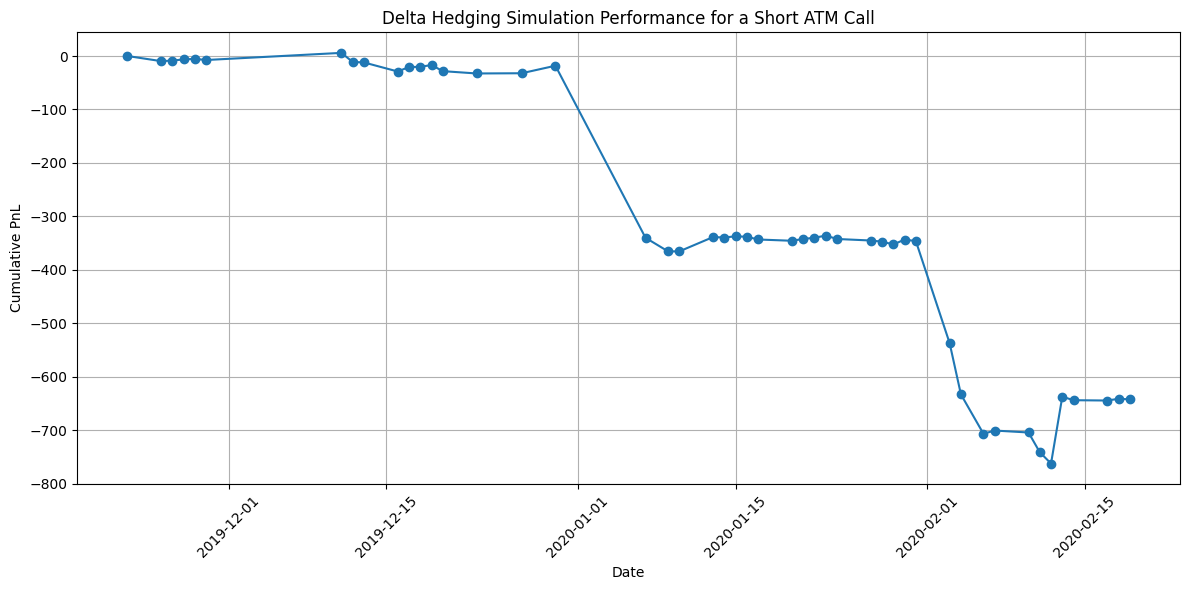

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(simulation_df['Date'], simulation_df['Cumulative_PnL'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Delta Hedging Simulation Performance for a Short ATM Call')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [79]:
mean_daily_pnl = simulation_df['Daily_PnL'].mean()
std_daily_pnl = simulation_df['Daily_PnL'].std()
final_cum_pnl = simulation_df['Cumulative_PnL'].iloc[-1]

print("Mean Daily PnL: {:.2f}".format(mean_daily_pnl))
print("STD of Daily PnL: {:.2f}".format(std_daily_pnl))
print("Total Hedged PnL at Expiration: {:.2f}".format(final_cum_pnl))


Mean Daily PnL: -13.67
STD of Daily PnL: 60.14
Total Hedged PnL at Expiration: -642.30
